In [6]:
import pandas as pd
import numpy as np

In [7]:
housing=pd.read_csv('Housing.csv')

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
#Map binary categorical features (yes/no) to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    housing[col] = housing[col].map({'yes': 1, 'no': 0})

In [11]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [12]:
#One-hot encode furnishingstatus (nominal categorical)
status=pd.get_dummies(housing['furnishingstatus']).astype(int)

In [13]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [14]:
status=pd.get_dummies(housing['furnishingstatus'],drop_first=True).astype(int)

In [15]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [16]:
housing=pd.concat([housing,status],axis=1)

In [17]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [18]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [19]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [20]:
housing['areaperbedroom']=housing['area']/housing['bedrooms']

In [21]:
housing['bbratio']=housing['bathrooms']/housing['bedrooms']

In [22]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


## SIMPLE LINEAR REGRESSION

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [24]:
X_simple = housing[['area']]
y = housing['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [26]:
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = simple_model.predict(X_test)

In [28]:
# Evaluation metrics
print("=== Simple Linear Regression ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred):,.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):,.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"Intercept: {simple_model.intercept_:.2f}")
print(f"Coefficient for area: {simple_model.coef_[0]:.2f}")

=== Simple Linear Regression ===
MAE: 1,474,748.13
MSE: 3,675,286,604,768.19
R²: 0.2729
Intercept: 2512254.26
Coefficient for area: 425.73


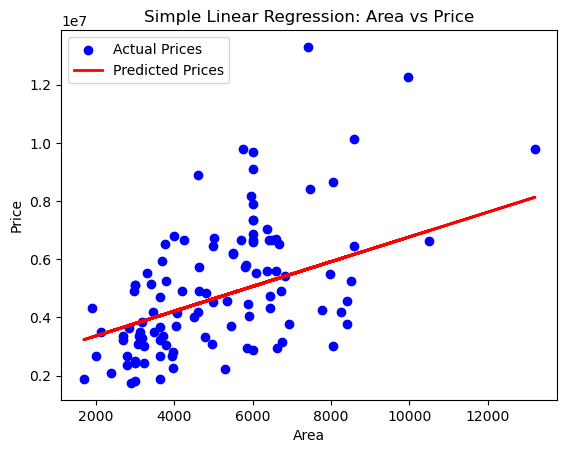

In [29]:
# Plot regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()

## Multiple Linear Regression (Using all features)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [32]:
X_multi = housing.drop('price', axis=1)
y =housing['price']

In [33]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

In [34]:
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

LinearRegression()

In [35]:
y_pred_m = multi_model.predict(X_test_m)

In [40]:
# Evaluation metrics
print("=== Multiple Linear Regression ===")
print(f"MAE: {mean_absolute_error(y_test_m, y_pred_m):,.2f}")
print(f"MSE: {mean_squared_error(y_test_m, y_pred_m):,.2f}")
print(f"R²: {r2_score(y_test_m, y_pred_m):.4f}")
print(f"Intercept: {multi_model.intercept_:.2f}")

=== Multiple Linear Regression ===
MAE: 965,585.65
MSE: 1,749,064,548,882.14
R²: 0.6540
Intercept: 1146860.11


In [42]:
print("\nCoefficients:")
for feature, coef in zip(X_multi.columns, multi_model.coef_):
    print(f"{feature:30}: {coef:.2f}")


Coefficients:
area                          : 318.85
bedrooms                      : -184379.91
bathrooms                     : 1347176.12
stories                       : 392877.02
mainroad                      : 361200.00
guestroom                     : 225567.48
basement                      : 387320.65
hotwaterheating               : 690476.63
airconditioning               : 795627.13
parking                       : 222281.68
prefarea                      : 611644.39
semi-furnished                : -142069.00
unfurnished                   : -426719.51
areaperbedroom                : -243.74
bbratio                       : -832126.18


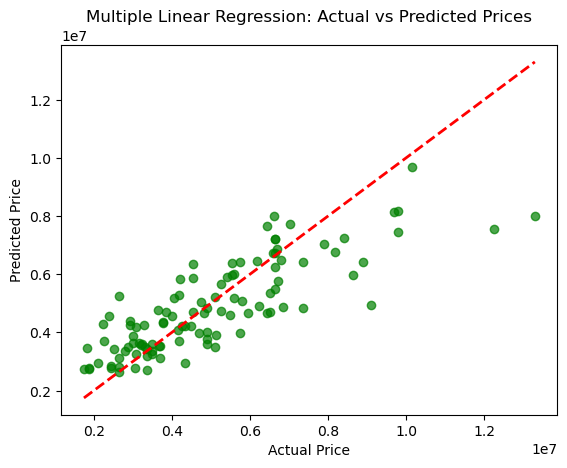

In [39]:
# Plot actual vs predicted prices
plt.scatter(y_test_m, y_pred_m, color='green', alpha=0.7)
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()],
         'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted Prices')
plt.show()